<a href="https://colab.research.google.com/github/HallelWeinberg/Image-Processing/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Histograms**
In this homework we will be writing python functions of histogram operations.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [13]:
def histImage(im):
    h = np.zeros(256)

    for i in range(0, len(im)):
        for j in range(0, len(im)):
            h[im[i, j]] += 1
    return h


def nhistImage(im):
    h = histImage(im)
    nh = np.zeros(256)

    for i in range(0, len(h)):
        nh[i] = h[i] / np.sum(h)
    return nh


def ahistImage(im):
    ah = histImage(im)

    for i in range(1, len(ah)):
        ah[i] += ah[i - 1]
    return ah


def calcHistStat(h):
    m = np.matmul(h, range(0, len(h))) / np.sum(h)
    v = np.matmul(h, np.square(m - range(0, len(h)))) / np.sum(h)

    return m, v


def mapImage(im, tm):
    nim = im.copy()

    for i in range(0, len(tm)):
        if tm[i] < 0:
            tm[i] = 0

        if tm[i] > 255:
            tm[i] = 255

        nim[im == i] = tm[i]

    return nim


def histEqualization(im):
    ah = ahistImage(im)
    goal = np.zeros(len(ah))

    for m in range(0, len(goal)):
        goal[m] = ah[len(ah) - 1] // len(goal)
    agoal = np.cumsum(goal)

    tm = np.zeros(len(ah))

    i = 0
    j = 0

    while i < len(ah) and j < len(agoal):
        if ah[i] < agoal[j]:
            agoal[j] -= ah[i]
            tm[i] = j
            i += 1

        else:
            j += 1

    return tm

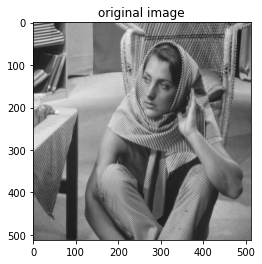

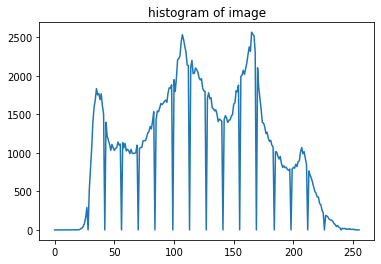

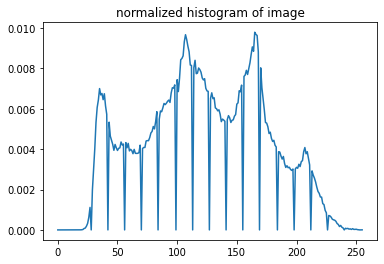

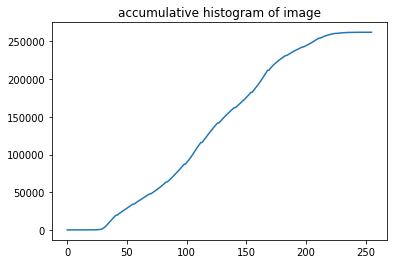

In [14]:
    # read the images you want to try on - in this example I'm using the four squares
    # image because it is easy to predict what the histogram will be
    image = cv2.imread(r"barbara.tif")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.figure(0)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('original image')
    plt.show()

    h = histImage(image)
    plt.figure(1)
    plt.plot(h)
    plt.title('histogram of image')
    plt.show()

    nh = nhistImage(image)
    plt.figure(2)
    plt.plot(nh)
    plt.title('normalized histogram of image')
    plt.show()

    ah = ahistImage(image)
    plt.figure(3)
    plt.plot(ah)
    plt.title('accumulative histogram of image')
    plt.show()

# Calculate mean and variance of histogram of the image:

In [15]:
    m, v = calcHistStat(h)
    print("mean = {}, variance ={}".format(m,v))

mean = 122.0999526977539, variance =2547.3494531227625


# Map an image using a tone mapping:

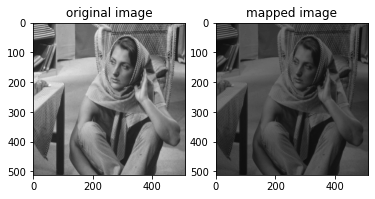

In [16]:
    tm_brighter = 2 * np.arange(256) + 10
    tm_darker = 1/2 * np.arange(256)
    tm_negative = 255 - np.arange(256)
    nm = mapImage(image, tm_darker)

    # plot
    plt.figure(5)
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('original image')
    # mapped image - should be darker/brighter/negative based on the tm you used
    plt.subplot(1, 2, 2)
    plt.imshow(nm, cmap='gray', vmin=0, vmax=255)
    plt.title('mapped image')
    plt.show()

# Calculate the tone mapping that maps im1 to an equalized histogram image:

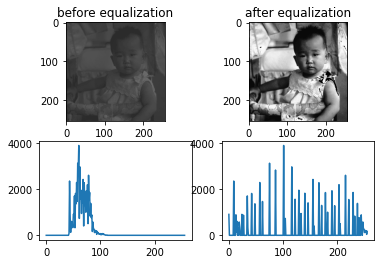

In [17]:
    im = cv2.imread(r"darkimage.tif")
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    tm_equalization = histEqualization(im)
    # to check if we had it correctly
    # apply the tone mapping to the image
    mappedImage = mapImage(im, tm_equalization)

    # plot
    plt.figure(6)
    plt.subplot(2, 2, 1)
    plt.imshow(im, cmap='gray', vmin=0, vmax=255)
    plt.title('before equalization')
    # equalized image
    plt.subplot(2, 2, 2)
    plt.imshow(mappedImage, cmap='gray', vmin=0, vmax=255)
    plt.title('after equalization')
    # histogram of original image
    plt.subplot(2, 2, 3)
    plt.plot(histImage(im))
    # histogram of equalized image
    plt.subplot(2, 2, 4)
    plt.plot(histImage(mappedImage))
    plt.show()